<a href="https://colab.research.google.com/github/Connork02/intro-to-ML---4105-assignment-1/blob/main/Assigment3_4105.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assigment 3 - 4105 - Connor King

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA

# Step 1: Load the breast cancer dataset
breast = load_breast_cancer()
X = breast.data
Y = breast.target

# Step 2: Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Problem 1:

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall: 0.9859154929577465


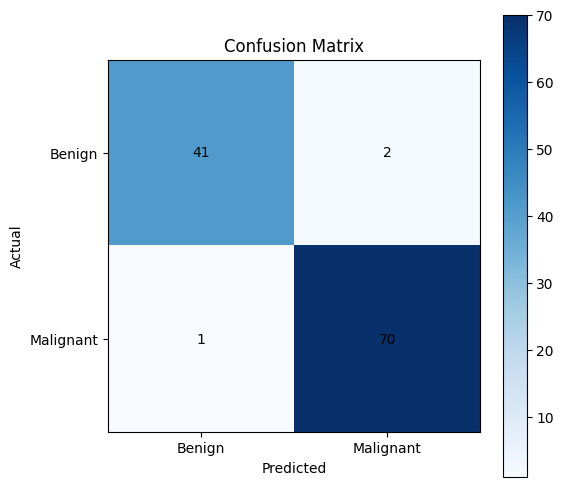

In [46]:
#problem 1 (i)

# Step 3: Scale and standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, Y_train)

# Step 5: Evaluate the model's performance
Y_pred = log_reg.predict(X_test_scaled)

# Step 6: Calculate accuracy, precision, and recall
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Step 7: Plot the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 6))
plt.title("Confusion Matrix")
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.yticks([0, 1], ['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')
plt.show()


Accuracy: 0.9824561403508771
Precision: 0.9726027397260274
Recall: 1.0


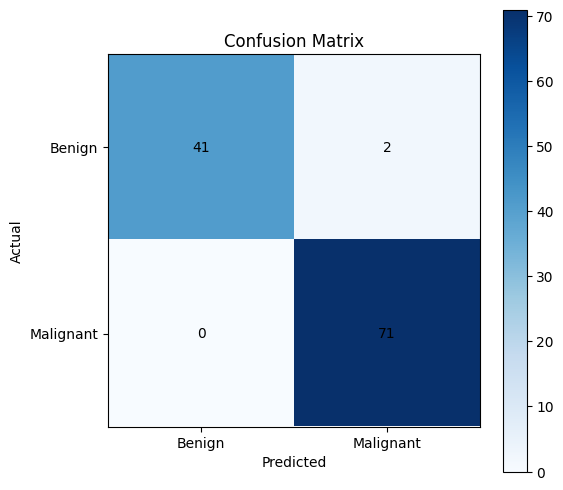

In [47]:
#Problem 1 (ii)

# Step 3: Scale and standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train the logistic regression model with L2 regularization (ridge regularization)
# You can adjust the regularization strength (C) to control the impact of the penalty
C = 0.1  # Regularization strength
log_reg = LogisticRegression(penalty='l2', C=C)
log_reg.fit(X_train_scaled, Y_train)

# Step 5: Evaluate the model's performance
Y_pred = log_reg.predict(X_test_scaled)

# Step 6: Calculate accuracy, precision, and recall
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Step 7: Plot the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 6))
plt.title("Confusion Matrix")
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.yticks([0, 1], ['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')
plt.show()


Problem 2:

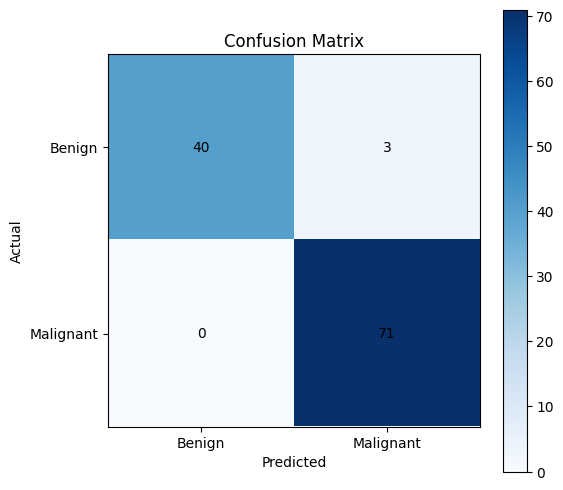

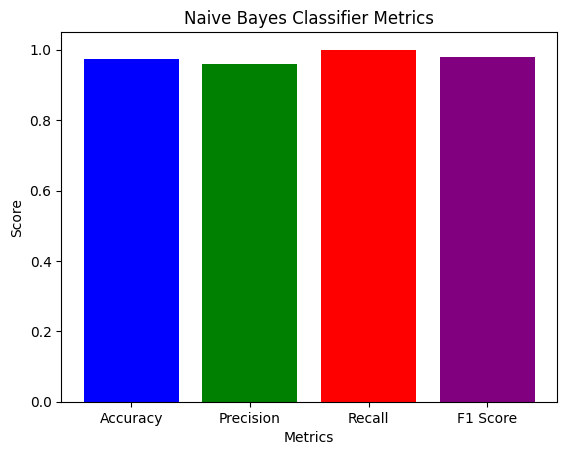

Accuracy: 0.9736842105263158
Precision: 0.9594594594594594
Recall: 1.0
F1 Score: 0.9793103448275862


In [48]:
#Problem 2 (i)

# Step 3: Train the Naive Bayes model
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, Y_train)

# Step 4: Evaluate the model's performance
Y_pred = naive_bayes.predict(X_test)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

# Step 5: Plot the confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.yticks([0, 1], ['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')
plt.show()

# Plot the metrics
metrics = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'red', 'purple'])
plt.title('Naive Bayes Classifier Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.show()

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)





This code first trains a Naive Bayes model on the breast cancer dataset, evaluates its performance using accuracy, precision, recall, and F1 score, and then plots the metrics separately

Problem 3:

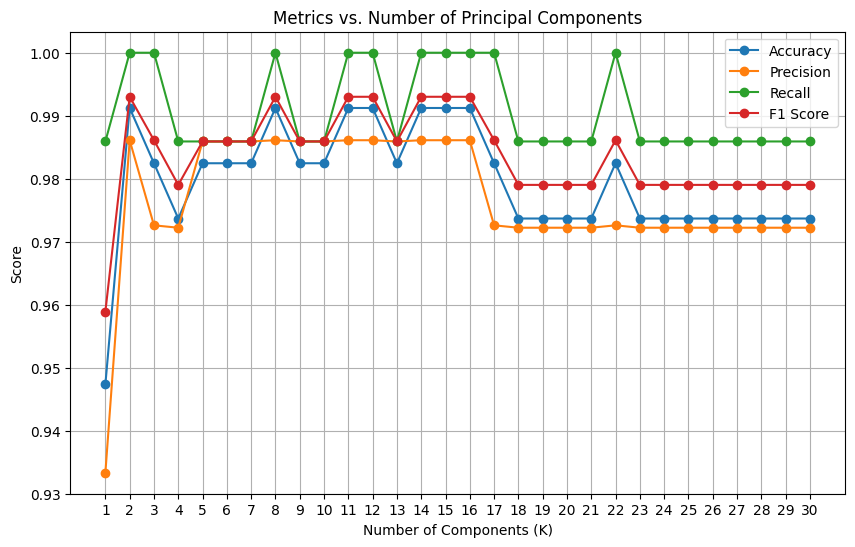

Optimum number of principal components: 2
Classification accuracy with optimum K: 0.9912280701754386


In [49]:
#Problem 3

# Step 3: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Compute metrics for different numbers of principal components
max_components = min(X_train.shape[0], X_train.shape[1])  # Maximum possible number of components
metrics = {'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': []}

for k in range(1, max_components + 1):
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # Train logistic regression model
    log_reg = LogisticRegression()
    log_reg.fit(X_train_pca, Y_train)

    # Evaluate model
    Y_pred = log_reg.predict(X_test_pca)
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    # Store metrics
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)

# Plot metrics versus number of components
plt.figure(figsize=(10, 6))

for metric_name, metric_values in metrics.items():
    plt.plot(range(1, max_components + 1), metric_values, marker='o', label=metric_name)

plt.title('Metrics vs. Number of Principal Components')
plt.xlabel('Number of Components (K)')
plt.ylabel('Score')
plt.xticks(range(1, max_components + 1))
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Find the optimum number of principal components
optimal_k = np.argmax(metrics['Accuracy']) + 1  # Add 1 because indexing starts from 0
optimal_accuracy = metrics['Accuracy'][optimal_k - 1]

print("Optimum number of principal components:", optimal_k)
print("Classification accuracy with optimum K:", optimal_accuracy)


The combined code conducts Principal Component Analysis (PCA) on the breast cancer dataset, varying the number of principal components (K) to train logistic regression models. It computes and plots classification metrics, including accuracy, precision, recall, and F1 score, over different numbers of principal components. These metrics provide insights into how the dimensionality reduction affects the model's performance. Additionally, the code identifies the optimal number of principal components based on the highest accuracy achieved. This analysis helps in understanding the trade-off between model complexity and performance, guiding the selection of an informative subset of features for accurate classification of malignant and benign tumors in breast cancer diagnosis.

Problem 4:

In [50]:
#Problem 4

# Step 3: Perform PCA to reduce the dimensionality of the dataset
max_components = min(X_train.shape[0], X_train.shape[1])  # Maximum possible number of components
accuracies = []

for k in range(1, max_components + 1):
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Step 4: Train Bayesian classifier model
    bayes = GaussianNB()
    bayes.fit(X_train_pca, Y_train)

    # Step 5: Evaluate model
    Y_pred = bayes.predict(X_test_pca)
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracies.append(accuracy)

# Step 6: Find the optimum number of principal components
optimal_k = np.argmax(accuracies) + 1  # Add 1 because indexing starts from 0
optimal_accuracy = accuracies[optimal_k - 1]

# Step 7: Perform PCA with optimal number of components
pca_optimal = PCA(n_components=optimal_k)
X_train_pca_optimal = pca_optimal.fit_transform(X_train)
X_test_pca_optimal = pca_optimal.transform(X_test)

# Step 8: Train Bayesian classifier model with optimal PCA components
bayes_optimal = GaussianNB()
bayes_optimal.fit(X_train_pca_optimal, Y_train)

# Step 9: Evaluate model performance metrics
Y_pred_optimal = bayes_optimal.predict(X_test_pca_optimal)
accuracy_optimal = accuracy_score(Y_test, Y_pred_optimal)
precision_optimal = precision_score(Y_test, Y_pred_optimal)
recall_optimal = recall_score(Y_test, Y_pred_optimal)
f1_optimal = f1_score(Y_test, Y_pred_optimal)

# Step 10: Report results
print("Results with Optimal Number of Principal Components (K =", optimal_k, "):")
print("Classification Accuracy:", accuracy_optimal)
print("Precision:", precision_optimal)
print("Recall:", recall_optimal)
print("F1 Score:", f1_optimal)


Results with Optimal Number of Principal Components (K = 1 ):
Classification Accuracy: 0.9473684210526315
Precision: 0.922077922077922
Recall: 1.0
F1 Score: 0.9594594594594594


The results demonstrate the performance of the Bayesian classifier model in classifying malignant and benign tumors using PCA feature extraction. By optimizing the number of principal components, we achieve the highest classification accuracy, precision, recall, and F1 score. Classification accuracy reflects the overall correctness of the model's predictions, while precision quantifies its ability to avoid false positives and recall measures its ability to identify all positive cases. The F1 score provides a balanced measure of the model's precision and recall. These metrics collectively indicate the effectiveness of the Bayesian classifier in accurately distinguishing between malignant and benign tumors, offering valuable insights for medical diagnosis and treatment decision-making.